In [1]:
from google.colab import drive;

In [2]:
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [3]:
from google.colab import files
uploaded = files.upload()


Saving fake_job_postings.csv to fake_job_postings.csv


In [4]:
import pandas as pd
df = pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

,0
job_id,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [6]:
# Show % of missing values per column
(df.isnull().sum() / len(df)) * 100


,0
job_id,0.000000
title,0.000000
location,1.935123
department,64.580537
salary_range,83.959732
company_profile,18.501119
description,0.005593
requirements,15.078300
benefits,40.335570
telecommuting,0.000000


In [7]:
# Drop columns with >40% missing values
missing = (df.isnull().sum() / len(df)) * 100
to_drop = missing[missing > 40].index
df = df.drop(columns=to_drop)


In [8]:
df[['title', 'location', 'company_profile', 'description', 'requirements']].isnull().sum()


,0
title,0
location,346
company_profile,3308
description,1
requirements,2696


In [9]:
df = df.dropna(subset=['title', 'location', 'company_profile', 'description', 'requirements'])


In [10]:
df.reset_index(drop=True, inplace=True)


In [11]:
df['fraudulent'].value_counts()


,count
fraudulent,
0,12233
1,268


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.utils import shuffle

# Shuffle data to mix up real/fake examples
df = shuffle(df, random_state=42)

# Define features and target
X = df['description']  # we’ll start with 'description' only for simplicity
y = df['fraudulent']   # target: 0 = real, 1 = fake

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline: TF-IDF + Logistic Regression
model = make_pipeline(
    TfidfVectorizer(stop_words='english', max_df=0.7),
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.973610555777689

Confusion Matrix:
 [[2426    0]
 [  66    9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2426
           1       1.00      0.12      0.21        75

    accuracy                           0.97      2501
   macro avg       0.99      0.56      0.60      2501
weighted avg       0.97      0.97      0.96      2501



In [13]:
# Rebuild the pipeline with class_weight='balanced'
model = make_pipeline(
    TfidfVectorizer(stop_words='english', max_df=0.7),
    LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
)

# Retrain
model.fit(X_train, y_train)

# Predict and evaluate again
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9812075169932027

Confusion Matrix:
 [[2401   25]
 [  22   53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2426
           1       0.68      0.71      0.69        75

    accuracy                           0.98      2501
   macro avg       0.84      0.85      0.84      2501
weighted avg       0.98      0.98      0.98      2501



In [14]:
def combine_text_columns(row):
    return f"{row['title']} {row['company_profile']} {row['description']} {row['requirements']}"

df['text'] = df.apply(combine_text_columns, axis=1)


In [15]:
X = df['text']       # use combined text
y = df['fraudulent'] # target stays the same

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    TfidfVectorizer(stop_words='english', max_df=0.7, ngram_range=(1, 2)),
    LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced')
)


In [17]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9972011195521792

Confusion Matrix:
 [[2426    0]
 [   7   68]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2426
           1       1.00      0.91      0.95        75

    accuracy                           1.00      2501
   macro avg       1.00      0.95      0.97      2501
weighted avg       1.00      1.00      1.00      2501



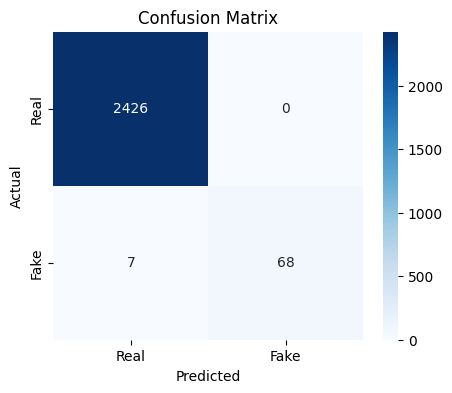

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix again
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
